# Customer analysis in marketing campaigns

In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

Use the recent know datetime in the dataset to estimate the age of customers

You have two days to do this study

In [208]:
import pandas as pd
import numpy as np
import missingno as msno
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#import plotly.graph_objs as go
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [209]:
df = pd.read_csv('../data/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [210]:
df['Dt_Customer'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object>

# EDA

<AxesSubplot:>

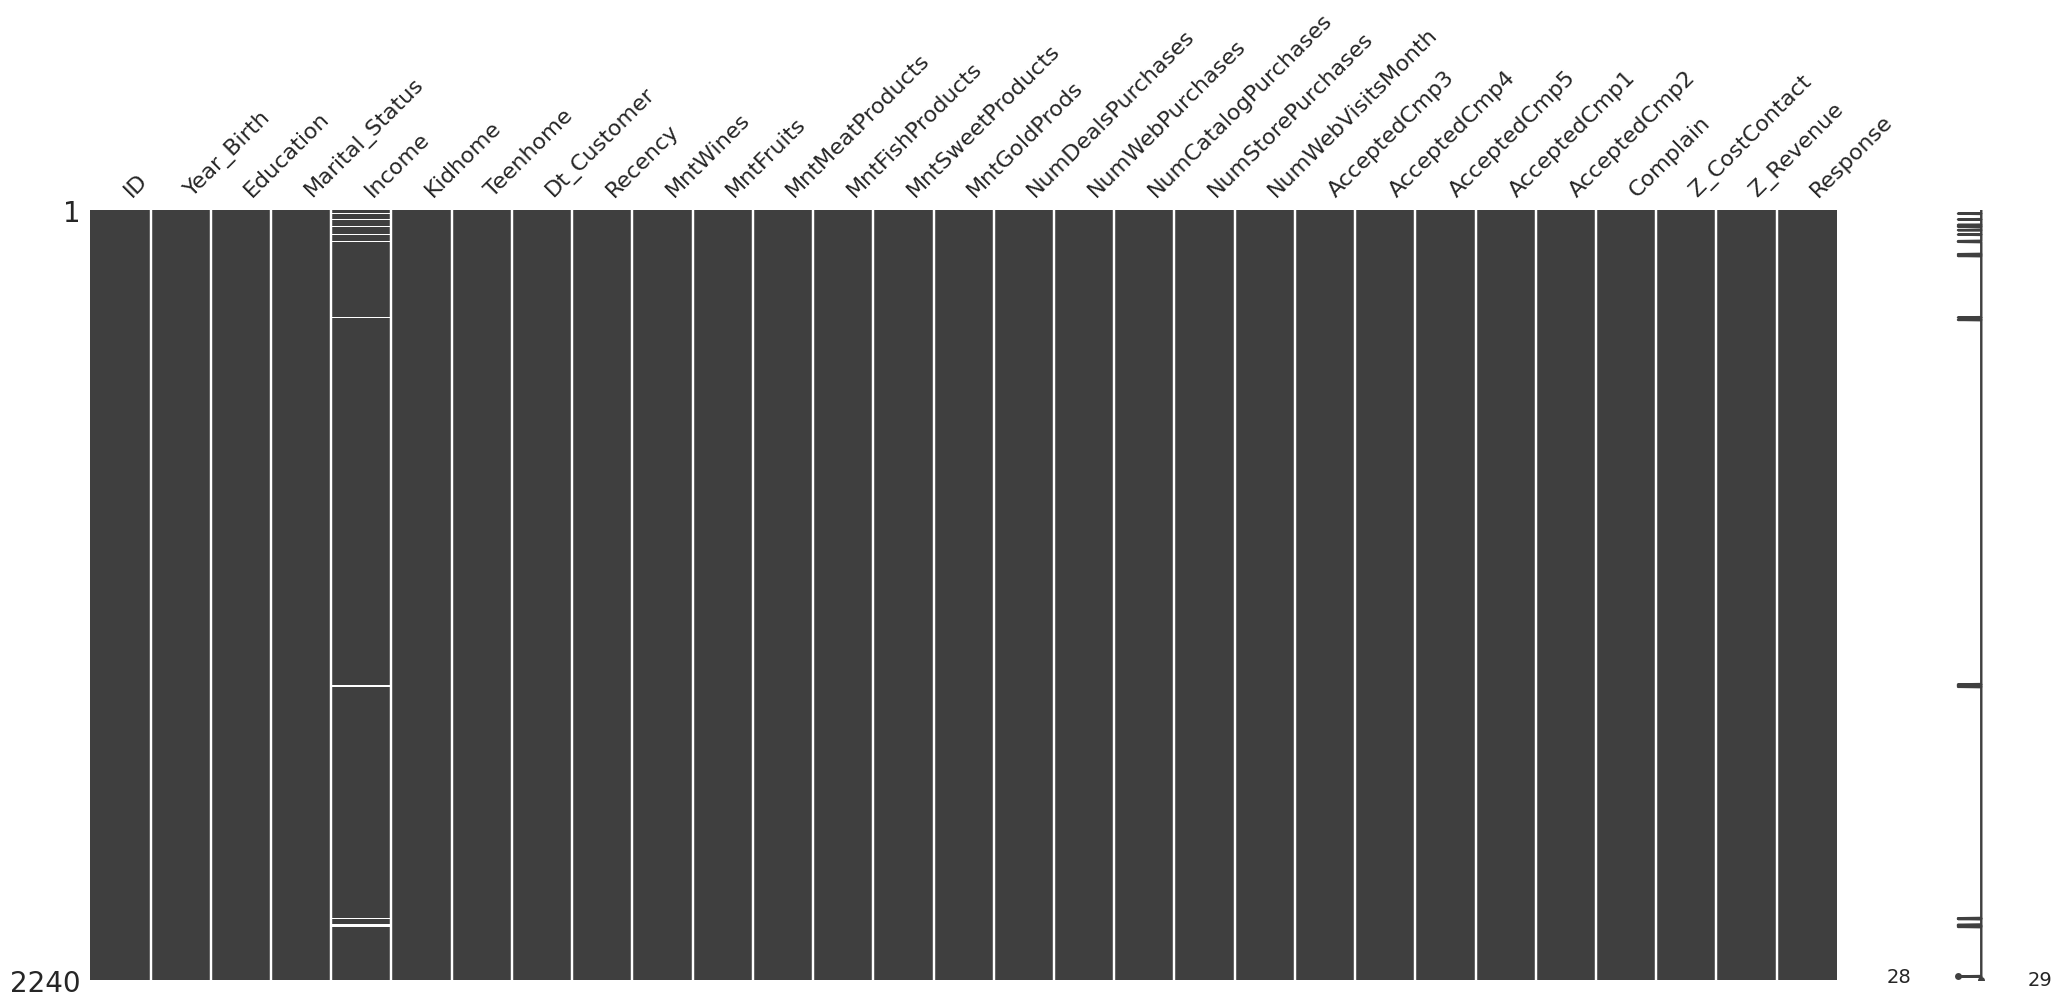

In [211]:
msno.matrix(df)

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [213]:
numeric = df.select_dtypes(exclude='object')
list(numeric.columns)
obj = df.select_dtypes(include='object')
list(obj.columns)

['Education', 'Marital_Status', 'Dt_Customer']

AxesSubplot(0.125,0.11;0.775x0.77)


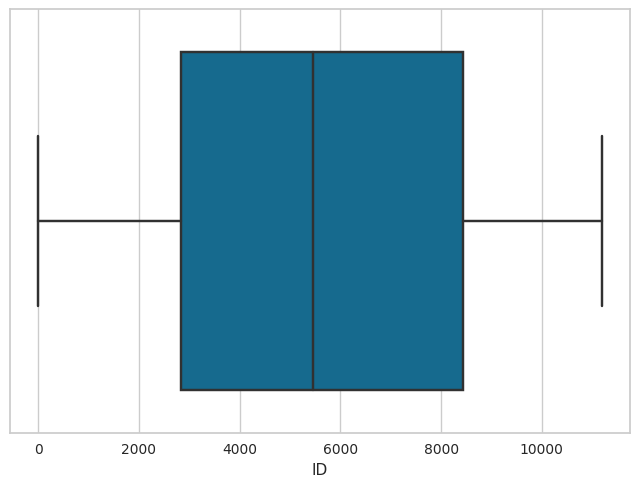

AxesSubplot(0.125,0.11;0.775x0.77)


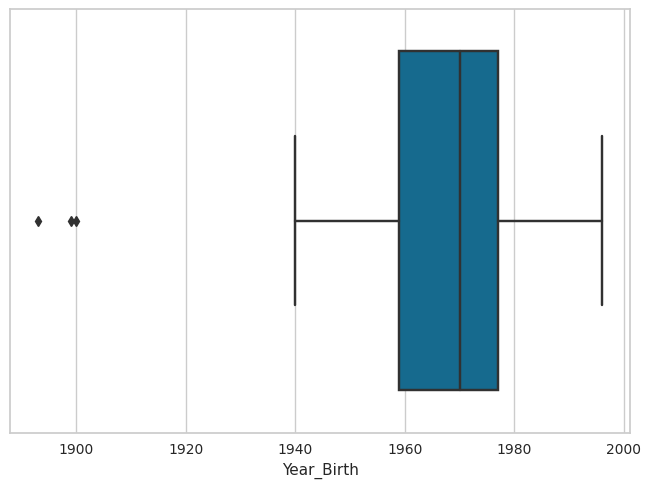

AxesSubplot(0.125,0.11;0.775x0.77)


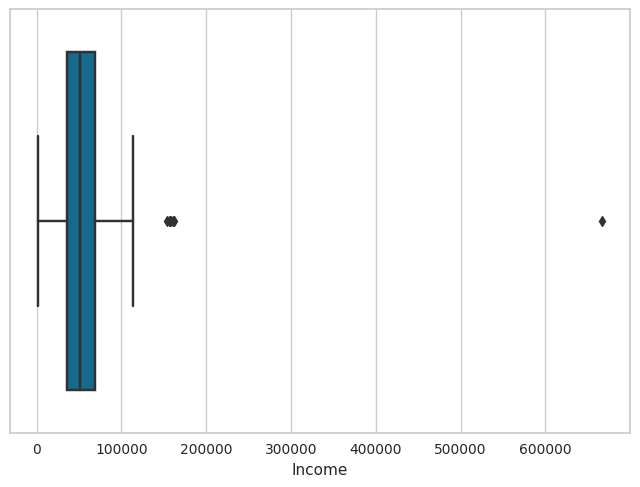

AxesSubplot(0.125,0.11;0.775x0.77)


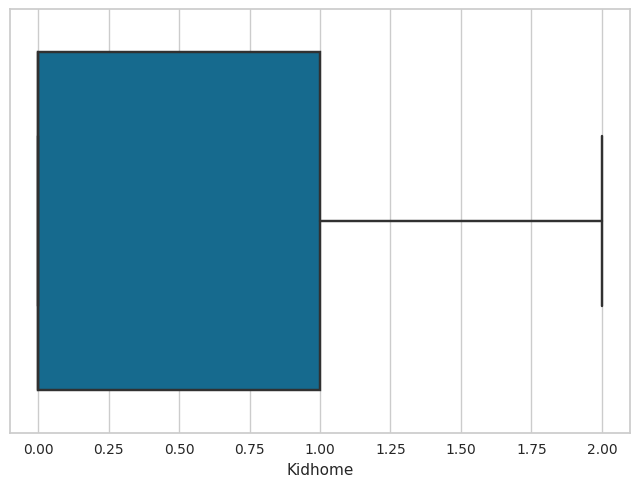

AxesSubplot(0.125,0.11;0.775x0.77)


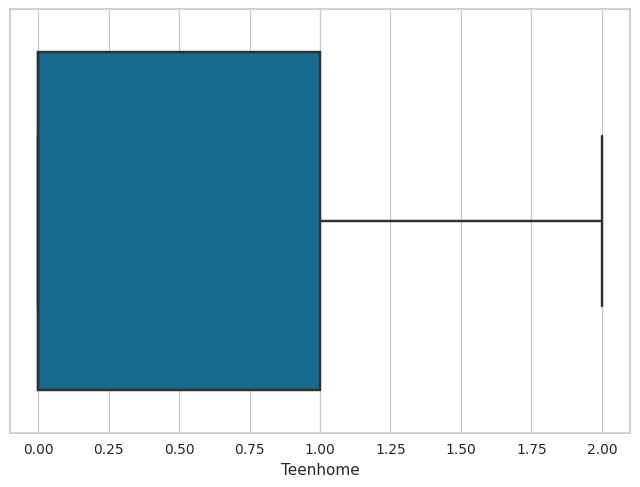

AxesSubplot(0.125,0.11;0.775x0.77)


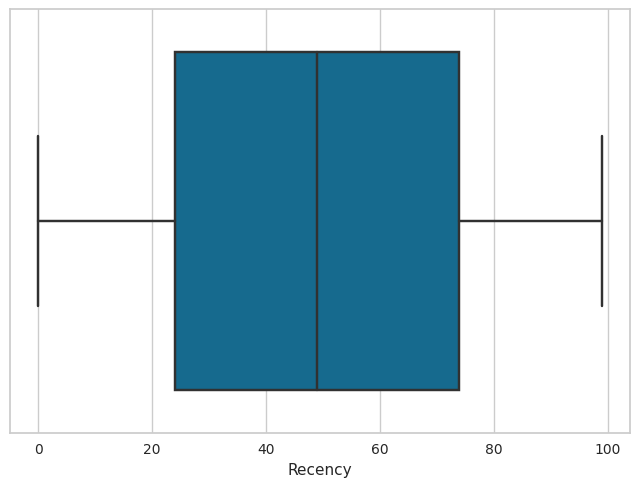

AxesSubplot(0.125,0.11;0.775x0.77)


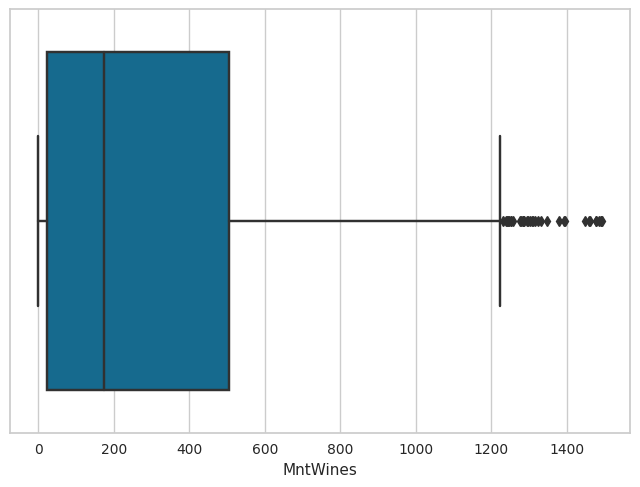

AxesSubplot(0.125,0.11;0.775x0.77)


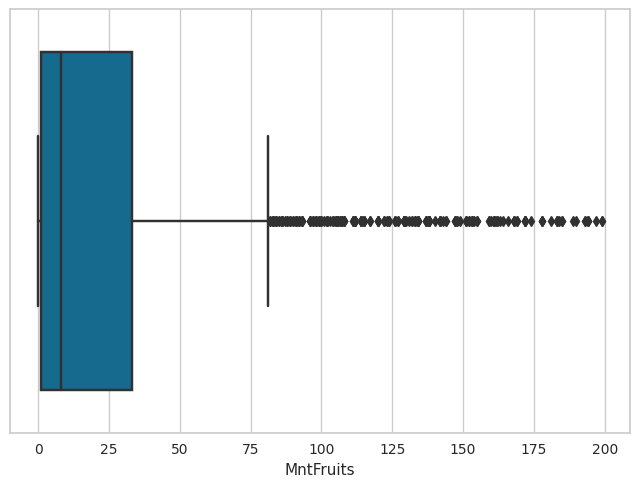

AxesSubplot(0.125,0.11;0.775x0.77)


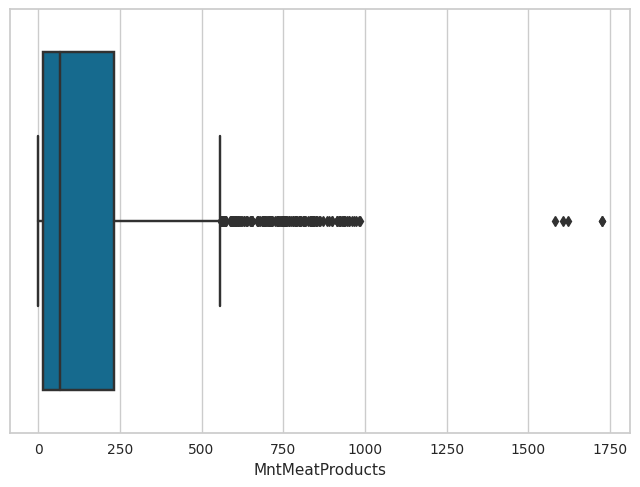

AxesSubplot(0.125,0.11;0.775x0.77)


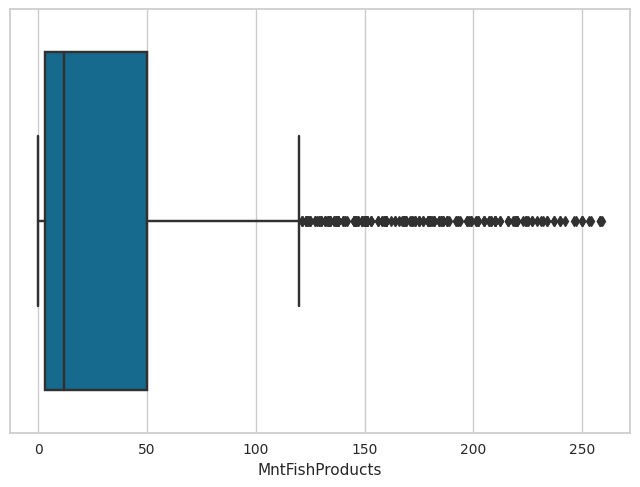

AxesSubplot(0.125,0.11;0.775x0.77)


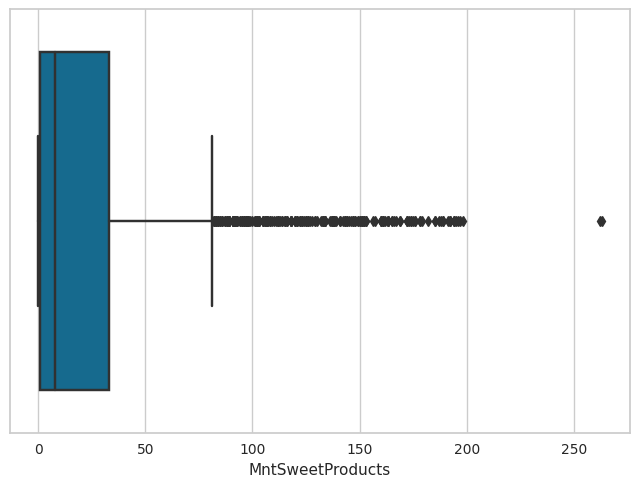

AxesSubplot(0.125,0.11;0.775x0.77)


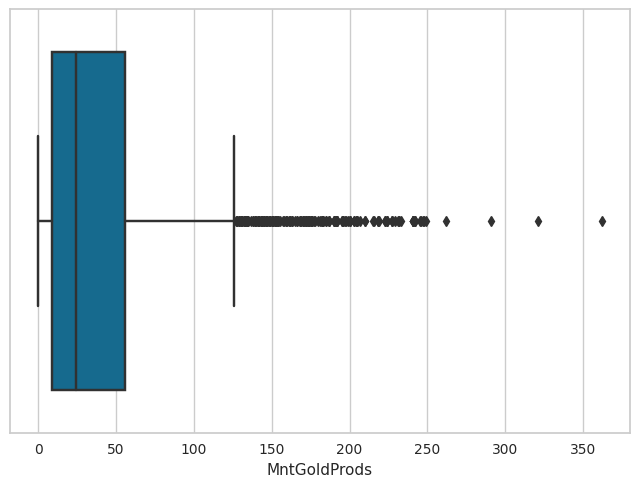

AxesSubplot(0.125,0.11;0.775x0.77)


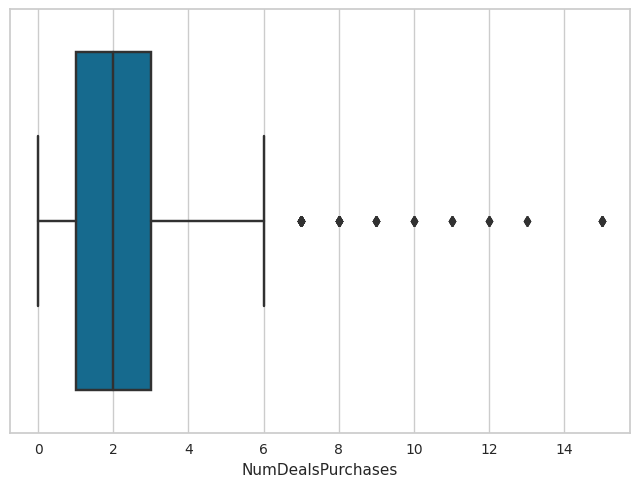

AxesSubplot(0.125,0.11;0.775x0.77)


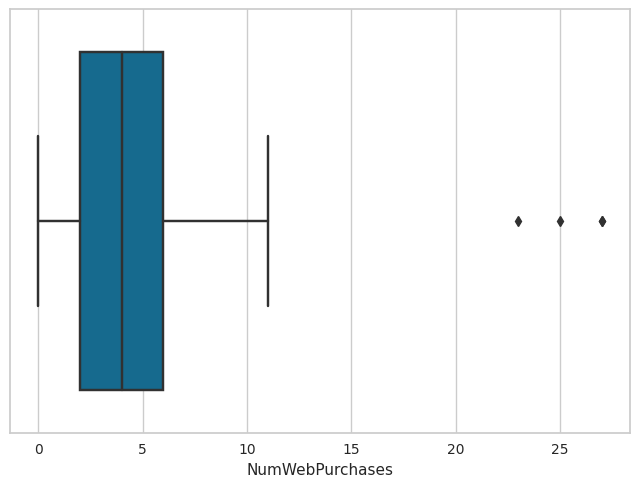

AxesSubplot(0.125,0.11;0.775x0.77)


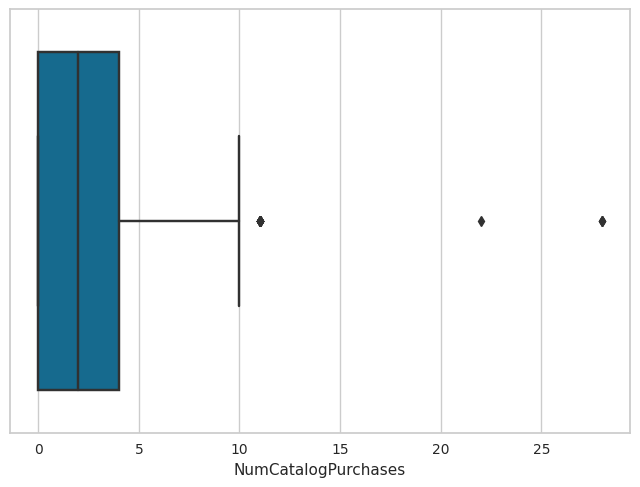

AxesSubplot(0.125,0.11;0.775x0.77)


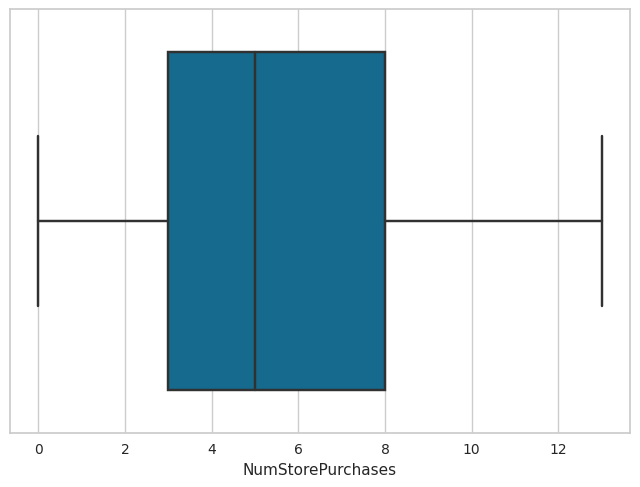

AxesSubplot(0.125,0.11;0.775x0.77)


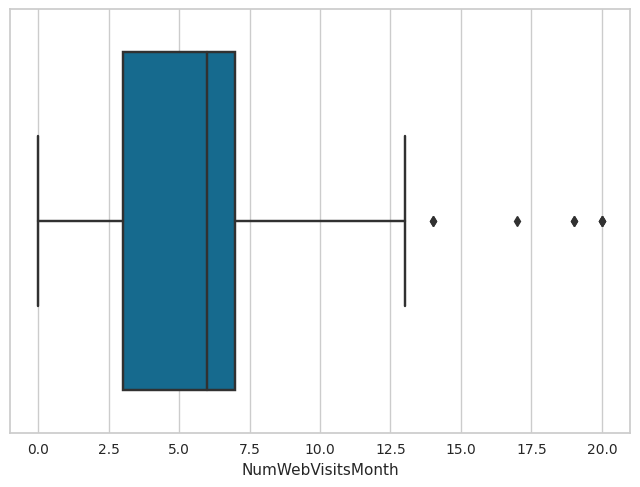

AxesSubplot(0.125,0.11;0.775x0.77)


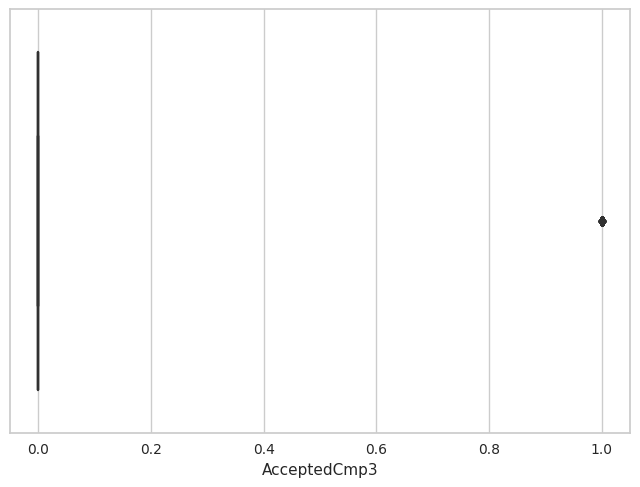

AxesSubplot(0.125,0.11;0.775x0.77)


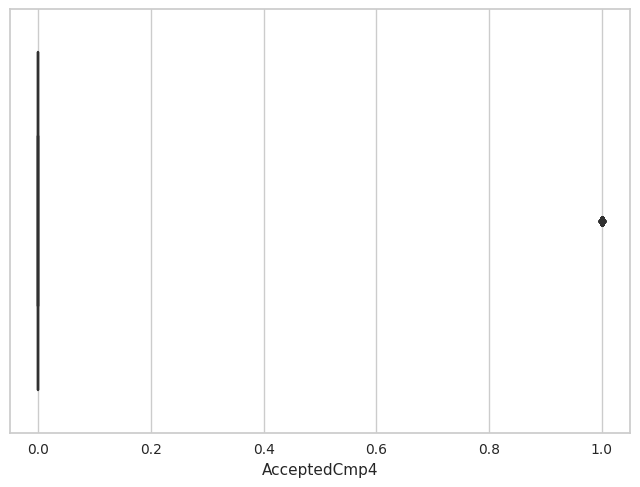

AxesSubplot(0.125,0.11;0.775x0.77)


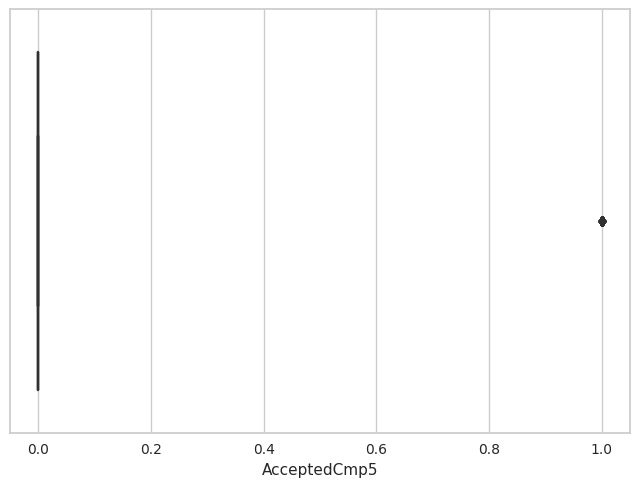

AxesSubplot(0.125,0.11;0.775x0.77)


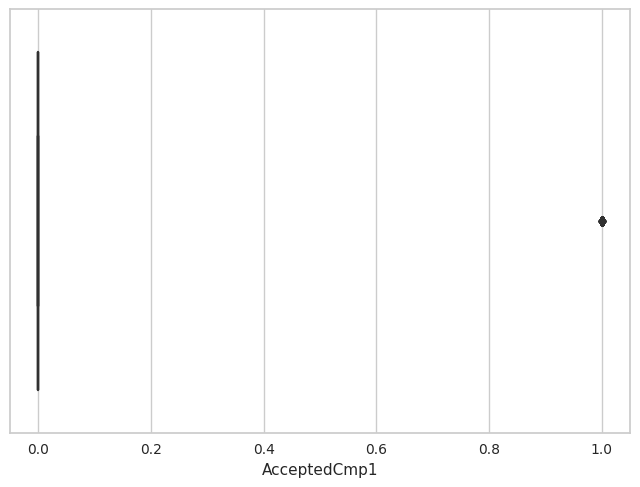

AxesSubplot(0.125,0.11;0.775x0.77)


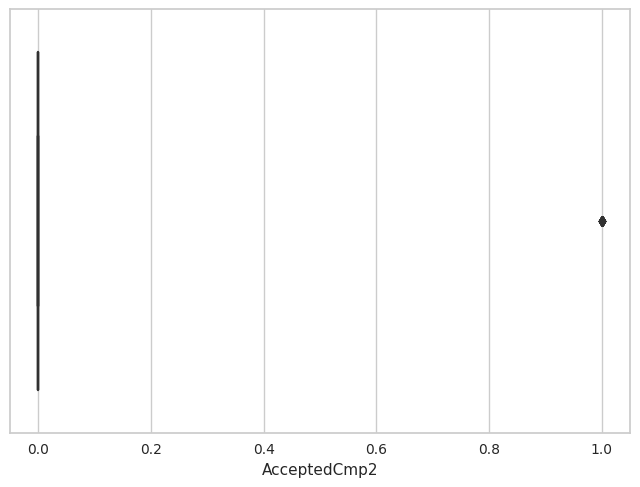

AxesSubplot(0.125,0.11;0.775x0.77)


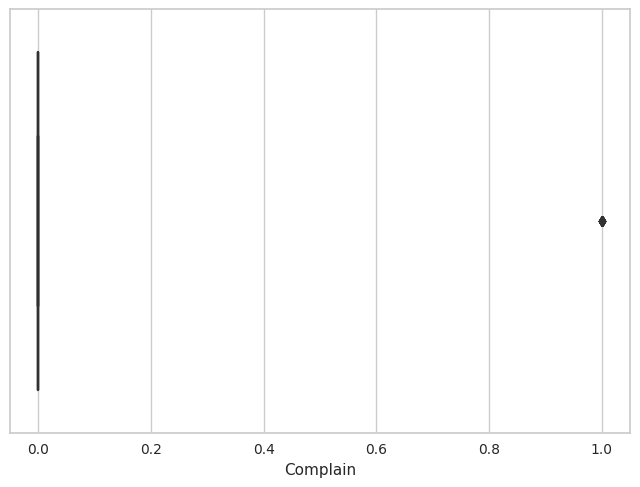

AxesSubplot(0.125,0.11;0.775x0.77)


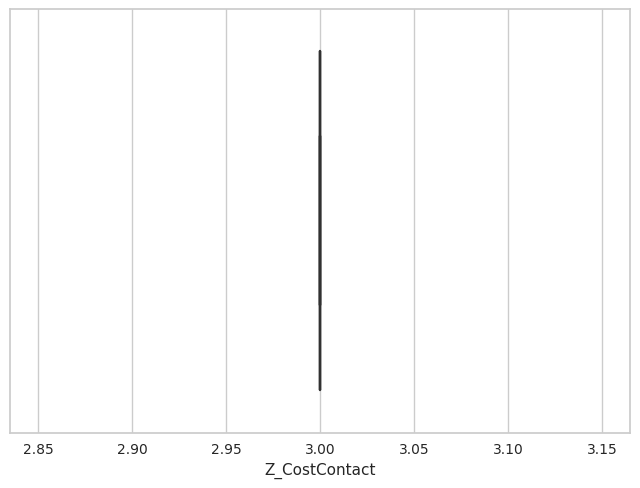

AxesSubplot(0.125,0.11;0.775x0.77)


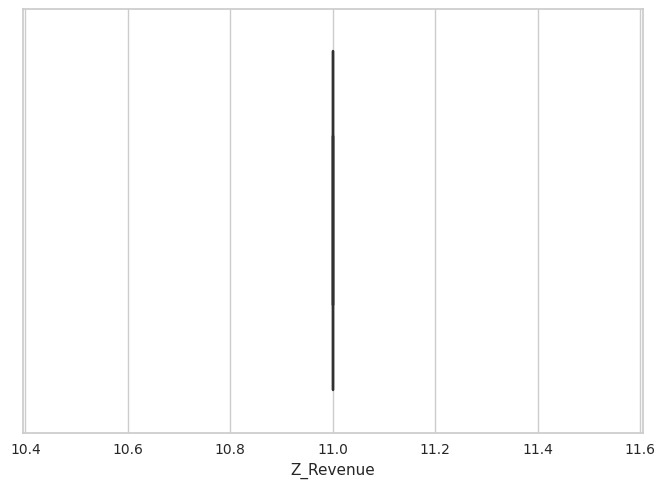

AxesSubplot(0.125,0.11;0.775x0.77)


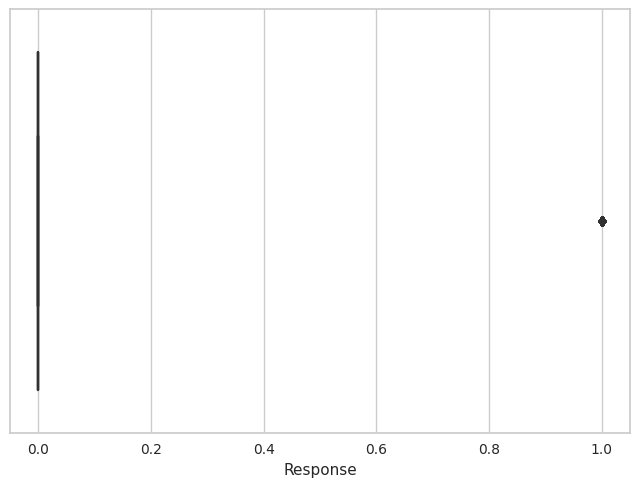

In [214]:
liste = ['ID', 'Year_Birth', 'Income','Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

for i in liste :
    print(sns.boxplot(data=numeric,x=i))
    plt.show()

### on enlève les lignes ou les années sont anterieurs a 1940

In [215]:
df_bis=df[df['Year_Birth']>1940]

In [216]:
df_bis = df_bis.dropna()

In [217]:
#define values
values = ['YOLO', 'Absurd', 'Alone']
#drop rows that contain any value in the list
df_bis = df_bis[df_bis.Marital_Status.isin(values) == False]

In [218]:
df_bis.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [219]:
df_bis

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


In [220]:
df_bis['Dt_Customer'] = df_bis['Dt_Customer'].astype('datetime64[ns]')

/home/kamel/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning:

Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/home/kamel/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning:

Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/home/kamel/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning:

Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/home/kamel/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:1163: UserWarning:

Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/home/kamel/.pyenv/versi

In [221]:
df_bis["age"] = df_bis["Dt_Customer"].dt.year - df_bis["Year_Birth"]

### quelques graphs

In [222]:
liste = ['Education','Marital_Status']

for i in liste:
    fig = px.histogram(df_bis, x=i,histfunc='count',text_auto=True)
    fig.show()

In [223]:
liste = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

for i in liste:
    fig = px.pie(df_bis, names=i, title='Accepted Cmp percentage')
    fig.show()

In [224]:
liste=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
       
for i in liste:
    fig = px.histogram(df_bis, x=i, title='Accepted Cmp percentage')
    fig.show()

In [225]:
# liste = ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']

# for i in liste:
#     fig = px.pie(df_bis, names=i, title='Population of European continent')
#     fig.show()

In [226]:
df_bis

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,4,7,0,0,0,0,0,0,1,55
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,10,4,0,0,0,0,0,0,0,48
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,4,6,0,0,0,0,0,0,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,4,5,0,0,0,0,0,0,0,46
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,5,7,0,0,0,1,0,0,0,68
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,13,6,0,1,0,0,0,0,0,33
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,10,3,0,0,0,0,0,0,0,58


In [227]:
df_bis.to_csv('df_bis.csv')

# Customer Segmentation

#### encodage valeur categorielles

In [228]:
df_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   object        
 3   Marital_Status       2205 non-null   object        
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   MntWines             2205 non-null   int64         
 10  MntFruits            2205 non-null   int64         
 11  MntMeatProducts      2205 non-null   int64         
 12  MntFishProducts      2205 non-null   int64         
 13  MntSweetProducts     2205 non-nul

In [229]:
df_bis = df_bis.reset_index()

In [230]:
df_bis

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,...,4,7,0,0,0,0,0,0,1,55
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,...,2,5,0,0,0,0,0,0,0,60
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,10,4,0,0,0,0,0,0,0,48
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,...,4,6,0,0,0,0,0,0,0,30
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,...,4,5,0,0,0,0,0,0,0,46
2201,2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,...,5,7,0,0,0,1,0,0,0,68
2202,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,13,6,0,1,0,0,0,0,0,33
2203,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,...,10,3,0,0,0,0,0,0,0,58


#### encodage

In [231]:
encoder=OneHotEncoder(sparse=False)
df_bis_enc = pd.DataFrame(encoder.fit_transform(df_bis[['Marital_Status']]))
df_bis_enc.columns = encoder.get_feature_names(['marital_status'])

/home/kamel/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [232]:
le=LabelEncoder()
edu_df = pd.DataFrame(le.fit_transform(df_bis[['Education']]))

/home/kamel/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [233]:
edu_df.rename(columns={0:'education'},inplace=True)

In [234]:
test = pd.concat([df_bis_enc,edu_df],axis=1)

In [235]:
test

,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,education
0,0.0,0.0,1.0,0.0,0.0,2
1,0.0,0.0,1.0,0.0,0.0,2
2,0.0,0.0,0.0,1.0,0.0,2
3,0.0,0.0,0.0,1.0,0.0,2
4,0.0,1.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...
2200,0.0,1.0,0.0,0.0,0.0,2
2201,0.0,0.0,0.0,1.0,0.0,4
2202,1.0,0.0,0.0,0.0,0.0,2
2203,0.0,0.0,0.0,1.0,0.0,3


In [236]:
df_bis

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,...,4,7,0,0,0,0,0,0,1,55
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,...,2,5,0,0,0,0,0,0,0,60
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,10,4,0,0,0,0,0,0,0,48
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,...,4,6,0,0,0,0,0,0,0,30
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,...,4,5,0,0,0,0,0,0,0,46
2201,2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,...,5,7,0,0,0,1,0,0,0,68
2202,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,...,13,6,0,1,0,0,0,0,0,33
2203,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,...,10,3,0,0,0,0,0,0,0,58


In [237]:
df_final = pd.concat([test,df_bis],axis=1)

<AxesSubplot:>

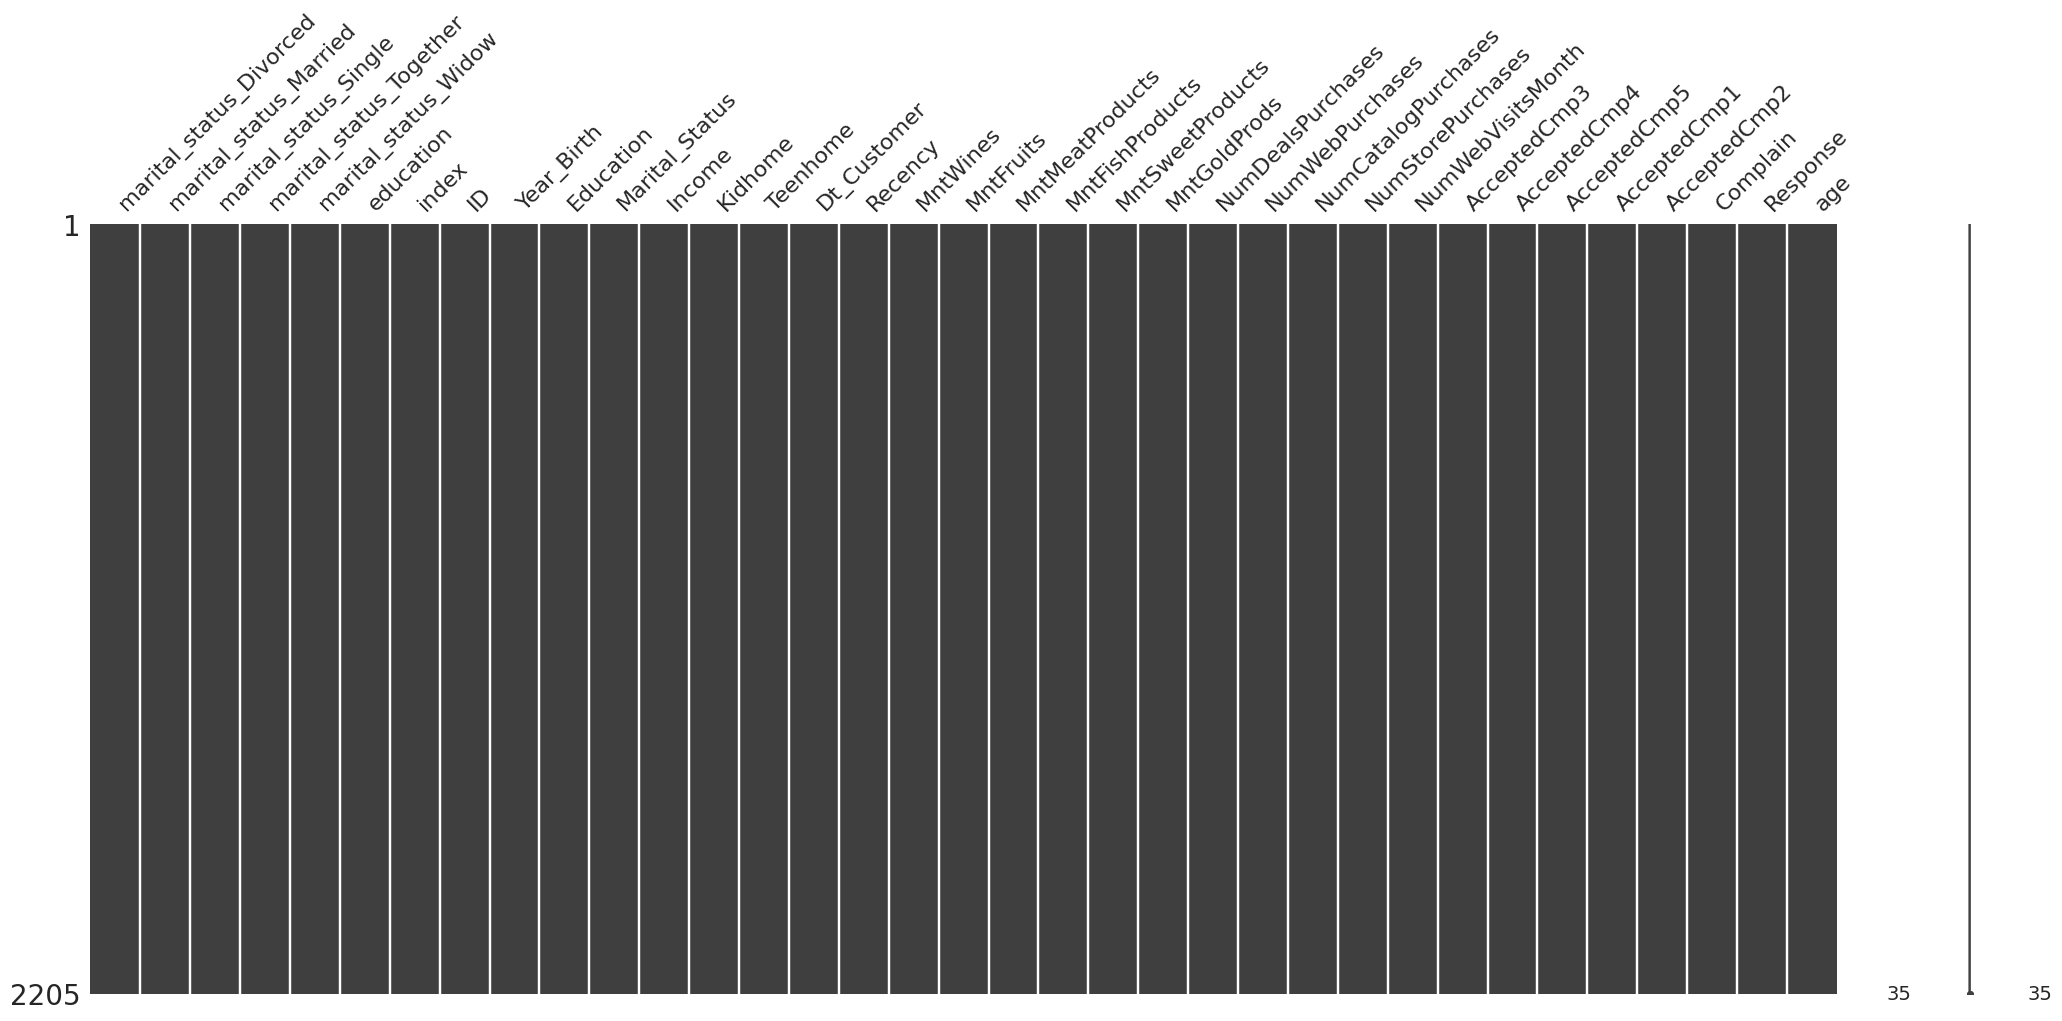

In [238]:
msno.matrix(df_final)

In [239]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   marital_status_Divorced  2205 non-null   float64       
 1   marital_status_Married   2205 non-null   float64       
 2   marital_status_Single    2205 non-null   float64       
 3   marital_status_Together  2205 non-null   float64       
 4   marital_status_Widow     2205 non-null   float64       
 5   education                2205 non-null   int64         
 6   index                    2205 non-null   int64         
 7   ID                       2205 non-null   int64         
 8   Year_Birth               2205 non-null   int64         
 9   Education                2205 non-null   object        
 10  Marital_Status           2205 non-null   object        
 11  Income                   2205 non-null   float64       
 12  Kidhome                  2205 non-

In [240]:
df_model = df_final.drop(df_final[['Education','Marital_Status','Dt_Customer']],axis=1)

In [241]:
#df_avant_rfm
df_model

,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,education,index,ID,Year_Birth,Income,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age
0,0.0,0.0,1.0,0.0,0.0,2,0,5524,1957,58138.0,...,4,7,0,0,0,0,0,0,1,55
1,0.0,0.0,1.0,0.0,0.0,2,1,2174,1954,46344.0,...,2,5,0,0,0,0,0,0,0,60
2,0.0,0.0,0.0,1.0,0.0,2,2,4141,1965,71613.0,...,10,4,0,0,0,0,0,0,0,48
3,0.0,0.0,0.0,1.0,0.0,2,3,6182,1984,26646.0,...,4,6,0,0,0,0,0,0,0,30
4,0.0,1.0,0.0,0.0,0.0,4,4,5324,1981,58293.0,...,6,5,0,0,0,0,0,0,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.0,1.0,0.0,0.0,0.0,2,2235,10870,1967,61223.0,...,4,5,0,0,0,0,0,0,0,46
2201,0.0,0.0,0.0,1.0,0.0,4,2236,4001,1946,64014.0,...,5,7,0,0,0,1,0,0,0,68
2202,1.0,0.0,0.0,0.0,0.0,2,2237,7270,1981,56981.0,...,13,6,0,1,0,0,0,0,0,33
2203,0.0,0.0,0.0,1.0,0.0,3,2238,8235,1956,69245.0,...,10,3,0,0,0,0,0,0,0,58


#### RFM

In [242]:
mt = df_model['MntWines']+df_model['MntFruits']+df_model['MntMeatProducts']+df_model['MntFishProducts']+df_model['MntSweetProducts']+df_model['MntGoldProds']

In [243]:
M=pd.DataFrame(mt)
M.rename(columns={0:'Montant'},inplace=True)

In [244]:
frequences=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
df_model['F']=df_model[frequences].sum(axis=1)

In [245]:
df_RFM = pd.concat([df_model,M],axis=1)

#### modelisation

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=19), k=(2, 20))

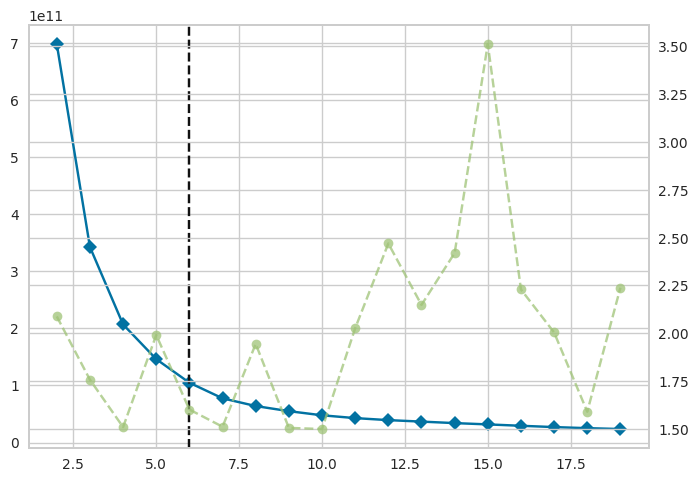

In [246]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

# Fit the data to the visualizer
visualizer.fit(df_model)        
#visualizer.show()  

In [247]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(df_model)
centers = model.cluster_centers_

In [248]:
df_model['cluster']=kmeans.labels_

In [249]:
# print(kmeans.feature_names_in_)
# print(kmeans.cluster_centers_)

In [250]:
fig = px.scatter_3d(df_model, x='education',y='age',z='Income',color='cluster', opacity=0.8)
fig.show()

In [251]:
score = silhouette_score(df_model, model.labels_, metric='euclidean')

In [252]:
score

0.35442434996599925

In [253]:
#visualizer_2 = SilhouetteVisualizer(kmeans, colors='yellowbrick')

In [254]:
# visualizer_2.fit(df_model)
# visualizer_2.show()  

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=19), k=(2, 20))

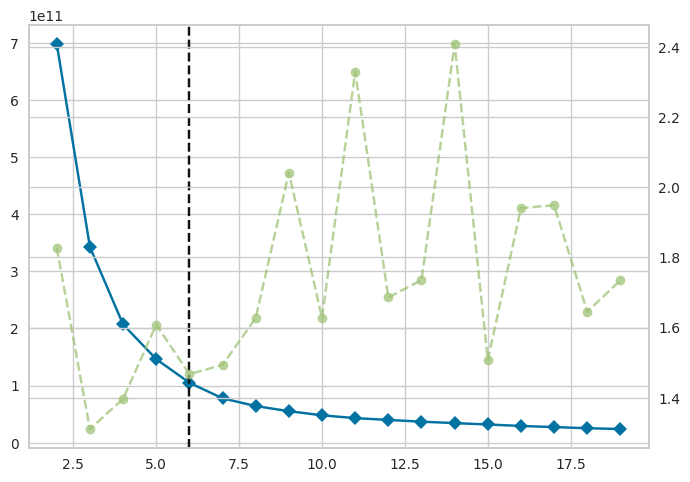

In [255]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,20))

# Fit the data to the visualizer
visualizer.fit(df_RFM)        
#visualizer.show()  

In [256]:
kmeans = KMeans(n_clusters=6, random_state=42).fit(df_model)
centers = model.cluster_centers_

In [257]:
#df_RFM.drop(['cluster'],axis=1, inplace=True)

In [258]:
df_RFM

,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Together,marital_status_Widow,education,index,ID,Year_Birth,Income,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,F,Montant
0,0.0,0.0,1.0,0.0,0.0,2,0,5524,1957,58138.0,...,0,0,0,0,0,0,1,55,22,1617
1,0.0,0.0,1.0,0.0,0.0,2,1,2174,1954,46344.0,...,0,0,0,0,0,0,0,60,4,27
2,0.0,0.0,0.0,1.0,0.0,2,2,4141,1965,71613.0,...,0,0,0,0,0,0,0,48,20,776
3,0.0,0.0,0.0,1.0,0.0,2,3,6182,1984,26646.0,...,0,0,0,0,0,0,0,30,6,53
4,0.0,1.0,0.0,0.0,0.0,4,4,5324,1981,58293.0,...,0,0,0,0,0,0,0,33,14,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.0,1.0,0.0,0.0,0.0,2,2235,10870,1967,61223.0,...,0,0,0,0,0,0,0,46,16,1341
2201,0.0,0.0,0.0,1.0,0.0,4,2236,4001,1946,64014.0,...,0,0,0,1,0,0,0,68,15,444
2202,1.0,0.0,0.0,0.0,0.0,2,2237,7270,1981,56981.0,...,0,1,0,0,0,0,0,33,18,1241
2203,0.0,0.0,0.0,1.0,0.0,3,2238,8235,1956,69245.0,...,0,0,0,0,0,0,0,58,21,843


In [259]:
df_RFM['cluster']=kmeans.labels_

In [260]:
fig = px.scatter_3d(df_RFM, x='Recency',y='F',z='Montant',color='cluster', opacity=0.8)
fig.show()

In [261]:
score = silhouette_score(df_RFM, model.labels_, metric='euclidean')
score

0.3480256451085947

In [262]:
#visualizer_2 = SilhouetteVisualizer(kmeans, colors='yellowbrick') 

In [263]:
# visualizer_2.fit(df_RFM)
# visualizer_2.show()  

## df que RFM pour le score

In [264]:
RFM = df_RFM[['Recency','F','Montant']]

In [265]:
RFM

,Recency,F,Montant
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53
4,94,14,422
...,...,...,...
2200,46,16,1341
2201,56,15,444
2202,91,18,1241
2203,8,21,843


In [266]:
RFM.rename(columns={"F":"Frequency"},inplace=True)

/tmp/ipykernel_799/843054833.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [267]:
RFM

,Recency,Frequency,Montant
0,58,22,1617
1,38,4,27
2,26,20,776
3,26,6,53
4,94,14,422
...,...,...,...
2200,46,16,1341
2201,56,15,444
2202,91,18,1241
2203,8,21,843


In [268]:
RFM['R'] = pd.qcut(RFM['Recency'], q=3, labels=[ 3, 2, 1])


/tmp/ipykernel_799/446782272.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [269]:
RFM['F'] = pd.qcut(RFM['Frequency'], q=3, labels=[1, 2, 3])

/tmp/ipykernel_799/1741977591.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [270]:

RFM['M'] = pd.qcut(RFM['Montant'], q=3, labels=[1, 2, 3])

/tmp/ipykernel_799/1726586804.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [271]:
RFM

,Recency,Frequency,Montant,R,F,M
0,58,22,1617,2,3,3
1,38,4,27,2,1,1
2,26,20,776,3,3,2
3,26,6,53,3,1,1
4,94,14,422,1,2,2
...,...,...,...,...,...,...
2200,46,16,1341,2,2,3
2201,56,15,444,2,2,2
2202,91,18,1241,1,3,3
2203,8,21,843,3,3,3


In [272]:
RFM['RFM'] = RFM['R'].astype(str) +\
             RFM['F'].astype(str) +\
            RFM['M'].astype(str)

/tmp/ipykernel_799/310739557.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [273]:
kmeans = KMeans(n_clusters=7, random_state=42).fit(RFM)
centers = model.cluster_centers_

In [274]:
RFM['cluster']=kmeans.labels_

/tmp/ipykernel_799/328607943.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [275]:
RFM

,Recency,Frequency,Montant,R,F,M,RFM,cluster
0,58,22,1617,2,3,3,233,4
1,38,4,27,2,1,1,211,5
2,26,20,776,3,3,2,332,3
3,26,6,53,3,1,1,311,5
4,94,14,422,1,2,2,122,6
...,...,...,...,...,...,...,...,...
2200,46,16,1341,2,2,3,223,1
2201,56,15,444,2,2,2,222,6
2202,91,18,1241,1,3,3,133,1
2203,8,21,843,3,3,3,333,3


In [276]:
fig = px.scatter_3d(RFM, x='Recency',y='Frequency',z='Montant',color='cluster', opacity=0.8)
fig.show()

In [277]:
fig = px.scatter_3d(RFM, x='Recency',y='Frequency',z='Montant',color='RFM', opacity=0.8)
fig.show()

In [278]:
def categ(x):
    if x in['323',"333"]:
        return "champion"
    elif x in['233','223']:
         return "Prenium" #Good recency, good frequency and purchase in zone 3
    elif x in['222','322', '232','332']:
        return "Loyal"#Good recency, good frequency but basket improvement because at 2
    elif x in['311', '312','211','212']:
         return "New Customers"#Recency near and low frequencies
    elif x in['112','122','123','132','133','111']:
         return "Sleeping"#Recency or frequency low, priority marketing campaign
    else:
         return "Non segmenter"

In [279]:
RFM_cat = RFM.copy()

In [280]:
RFM_cat['Catégorie'] = RFM_cat['RFM'].apply(categ)

In [281]:
le=LabelEncoder()
RFM_cat['Cat_clust'] = pd.DataFrame(le.fit_transform(RFM_cat[['Catégorie']]))

/home/kamel/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [282]:
RFM_cat

,Recency,Frequency,Montant,R,F,M,RFM,cluster,Catégorie,Cat_clust
0,58,22,1617,2,3,3,233,4,Prenium,2
1,38,4,27,2,1,1,211,5,New Customers,1
2,26,20,776,3,3,2,332,3,Loyal,0
3,26,6,53,3,1,1,311,5,New Customers,1
4,94,14,422,1,2,2,122,6,Sleeping,3
...,...,...,...,...,...,...,...,...,...,...
2200,46,16,1341,2,2,3,223,1,Prenium,2
2201,56,15,444,2,2,2,222,6,Loyal,0
2202,91,18,1241,1,3,3,133,1,Sleeping,3
2203,8,21,843,3,3,3,333,3,champion,4


In [283]:
fig = px.scatter_3d(RFM_cat, x='Recency',y='Frequency',z='Montant',color='Cat_clust', opacity=0.8)
fig.show()

In [284]:
fig = px.histogram(RFM_cat, x='Catégorie',histfunc='count',color='Catégorie',barmode='group')
fig.show(renderer="iframe")

In [285]:
df_final['Cat_clust'] = RFM_cat['Cat_clust']
df_final['Catégorie'] = RFM_cat['Catégorie']

In [286]:
df_final.columns

Index(['marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Together',
       'marital_status_Widow', 'education', 'index', 'ID', 'Year_Birth',
       'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'age', 'Cat_clust', 'Catégorie'],
      dtype='object')

In [287]:
df_Final = df_final.drop(['marital_status_Divorced', 'marital_status_Married',
       'marital_status_Single', 'marital_status_Together',
       'marital_status_Widow', 'education'],axis=1)

In [288]:
df_Final.drop(['index'],axis=1,inplace=True)

In [289]:
df_Final

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,Cat_clust,Catégorie
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,1,55,2,Prenium
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,0,60,1,New Customers
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,48,0,Loyal
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,0,30,1,New Customers
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,33,3,Sleeping
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,0,46,2,Prenium
2201,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,0,0,1,0,0,0,68,0,Loyal
2202,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,0,33,3,Sleeping
2203,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,0,58,4,champion


In [290]:
groupe = df_Final.groupby('Catégorie').mean()

In [291]:
groupe.reset_index
groupe.describe

<bound method NDFrame.describe of                         ID   Year_Birth        Income   Kidhome  Teenhome  \
Catégorie                                                                   
Loyal          5656.560465  1966.972093  53248.190698  0.393023  0.737209   
New Customers  5730.517056  1972.046679  33329.253142  0.813285  0.430880   
Prenium        5308.439516  1966.016129  71977.318548  0.064516  0.447581   
Sleeping       5456.979508  1969.028689  52264.229508  0.445355  0.498634   
champion       5840.382353  1967.773109  73977.079832  0.046218  0.344538   

                 Recency    MntWines  MntFruits  MntMeatProducts  \
Catégorie                                                          
Loyal          31.518605  250.581395  18.620930        97.983721   
New Customers  32.129264   22.220826   3.788151        14.107720   
Prenium        50.459677  681.431452  55.911290       375.762097   
Sleeping       82.520492  304.166667  26.572404       175.072404   
champion       15.

## Focus Campaign

In [292]:
# Defining function for percentage display on plot
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

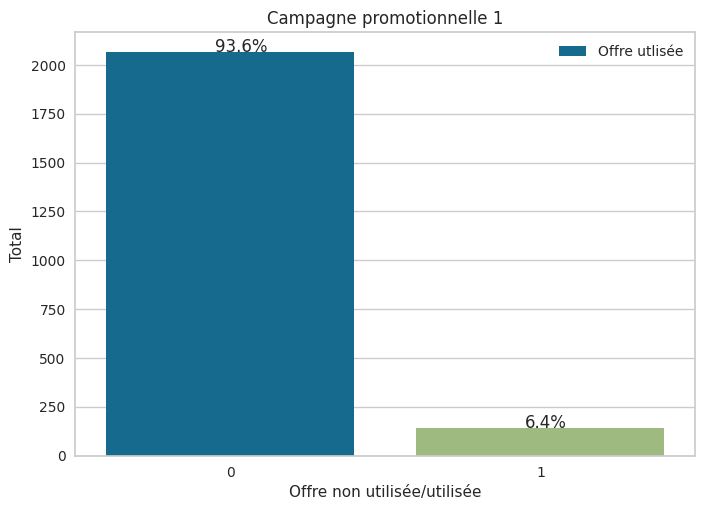

In [293]:
# Percentage of customer using offer of the first campaign
ax = sns.countplot(x=df_Final['AcceptedCmp1'])
plt.legend(labels = ['Offre utlisée'])
ax.set(xlabel='Offre non utilisée/utilisée', ylabel='Total', title='Campagne promotionnelle 1')
without_hue(ax,df_Final['AcceptedCmp1'])

In [294]:
fig, axes = plt.subplots(1, 2)
fig.suptitle('Pyramide des âges par sexe')

sns.histplot(ax=axes[0], y=df_Final[df_Final['AcceptedCmp1']== 0 ]['Catégorie'],bins=10,
             hue=df_Final[df_Final['AcceptedCmp1']== 0]['Income'],palette=['blue','darkblue'])

x_limits = [0, 3600]

axes[0].set_xlim(x_limits)
axes[0].invert_xaxis()
axes[0].set_title('Hommes')

sns.histplot(ax=axes[1], y=df_Final[df_Final['AcceptedCmp1']==1]['Catégorie'],bins=10,
             hue=['AcceptedCmp1']==0]['Income'],palette=['purple','pink'])
axes[1].set_xlim(x_limits)
axes[1].set_yticklabels([])
axes[1].set_ylabel('')
axes[1].set_title('Femmes')

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 13 (2604249618.py, line 14)

In [ ]:
df_final.to_csv('df_campagne.csv')

In [297]:
name_produits_pourcentage = df_Final['Catégorie'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
name_produits_pourcentage.head(10)

Sleeping          33.2%
New Customers    25.26%
Loyal             19.5%
Prenium          11.25%
champion         10.79%
Name: Catégorie, dtype: object

In [298]:
name_produits_pourcentage = df['Catégorie'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
df1 = pd.DataFrame(name_produits_pourcentage)

KeyError: 'Catégorie'

In [ ]:
name_produits_pourcentage = df_Final['Catégorie'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
name_produits_pourcentage.head(10)

In [ ]:
groupetest = df_Final.groupby('Catégorie').mean()

In [ ]:
ax = sns.countplot(x="AcceptedCmp1", hue="Catégorie", data= df_Final)
without_hue(ax,df_Final['AcceptedCmp1'])

In [ ]:
ax = sns.countplot(x="AcceptedCmp1", hue="Catégorie", data= df_Final)
without_hue(ax,df_Final['AcceptedCmp2'])

In [ ]:
df_final.to_csv('df_campagne.csv')

In [ ]:
 hue_order = [2,4,0,1,3]
sns.histplot(data =  df_Final,  x = 'Dt_Customer', hue= 'Cat_clust', palette='Set1', hue_order=hue_order, kde = True)

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    y = [28.8, 28.5, 37, 56.8, 69.7, 79.7, 78.5, 77.8, 74.1, 62.6, 45.3, 39.9]
))

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 3, 5, 7, 9, 11],
        ticktext = ['One', 'Three', 'Five', 'Seven', 'Nine', 'Eleven']
    )
)

fig.show()

In [ ]:
# px.line(df_Final, x = df_Final['Dt_Customer'], y = df_Final['Catégorie'])

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

arr = np.array([
        ['Dog', 'M'], ['Dog', 'M'], ['Dog', 'F'], ['Dog', 'F'],
        ['Cat', 'F'], ['Cat', 'F'], ['Cat', 'F'], ['Cat', 'M'],
        ['Fox', 'M'], ['Fox', 'M'], ['Fox', 'M'], ['Fox', 'F'],
        ['Dog', 'F'], ['Dog', 'F'], ['Cat', 'F'], ['Dog', 'M']
    ])

df = pd.DataFrame(arr, columns=['A', 'G'])

df_g = df.groupby(['A', 'G']).size().reset_index()
df_g['percentage'] = df.groupby(['A', 'G']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['A', 'G', 'Counts', 'Percentage']

px.bar(df_g, x='A', y=['Counts'], color='G', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)))

In [ ]:
name_produits_pourcentage = df['product_category_name_english'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
name_produits_pourcentage.head(10)

# Conlusions